# Imports

In [42]:
import utils.others as others

print(f"Last updated by: ", others.get_latest_update_by())
logging_enabled = False

import torch

from datasets.deepfake_ecg.Deepfake_ECG_Dataset import Deepfake_ECG_Dataset
from datasets.deepfake_ecg.Deepfake_ECG_Dataset import HR_PARAMETER




Last updated by:  --Not running in servers--


# Regression
# Loading the saved model

In [43]:
parameter = HR_PARAMETER


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
real_label = [0,0,0,1,0]


# Create the model
model = torch.load("3_simple_lstm.py_hr_20240330_123731_silvery-shadow-116",map_location="cpu")

# Create the dataset class
dataset = Deepfake_ECG_Dataset(parameter=parameter,output_type="default")
print(dataset[0][0].shape)

Not running in ampere. Loading data from disk
loading ground truth labels
loaded ground truth labels
torch.Size([40000])


# Plot ECG waveforms

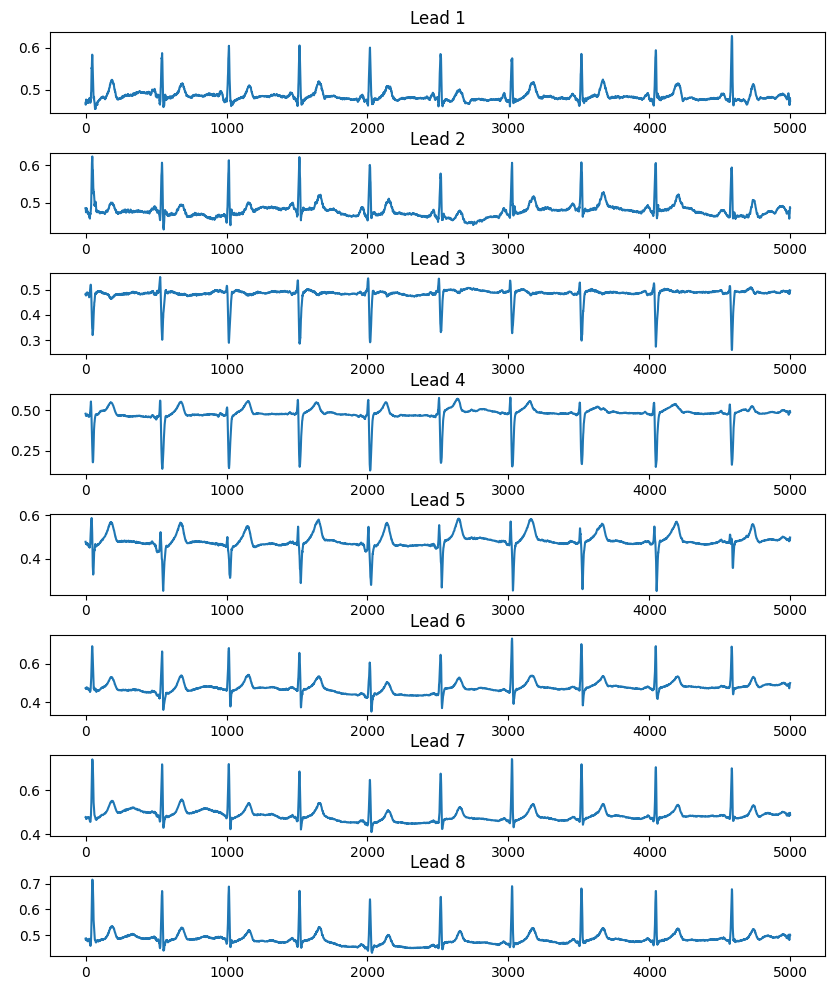

In [44]:
import matplotlib.pyplot as plt

# Assuming your list of 40,000 numbers is called 'data'
data = dataset[0][0]

# Number of leads
num_leads = 8

# Number of samples per lead
samples_per_lead = len(data) // num_leads

# Create a figure with 8 subplots
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(10, 12))

# Iterate over the leads
for i in range(num_leads):
    start = i * samples_per_lead
    end = start + samples_per_lead
    lead_data = data[start:end]
    
    # Plot the lead data on the respective subplot
    axs[i].plot(lead_data)
    axs[i].set_title(f'Lead {i+1}')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

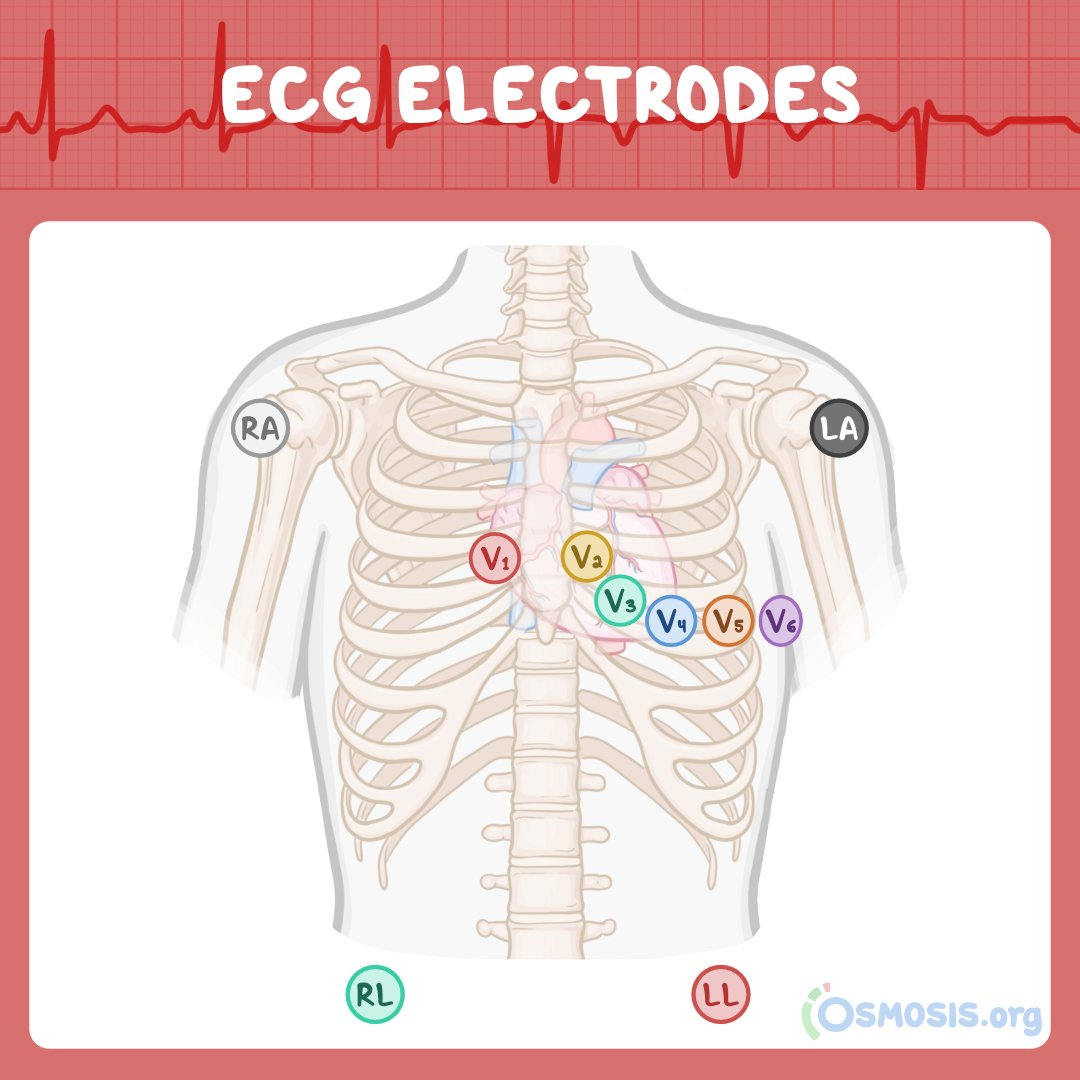



# Heart Rate prediction

In [45]:
with torch.no_grad():
    data = dataset[0][0].unsqueeze(0).to(device)
    print(f"Real HR value: {dataset[0][1]} --- Predicted HR value: {model(data)}")

Real HR value: tensor([67.7201]) --- Predicted HR value: tensor([[67.7464]])


# Classification
# Loading saved model

In [46]:
# Create the model
model = torch.load("3_simple_lstm_classification.py_CLASSIFICATION_20240503_090248_fresh-voice-38",map_location="cpu")


# Create the dataset class
data = dataset[0][0].unsqueeze(0).to(device)

# Cardiovascular disease prediction

tensor([[-0.1143, -0.1880, -1.3884,  0.9235, -0.4285]])
Real class: [0, 0, 0, 1, 0] --- Predicted HR value: [0.17353985 0.16122371 0.04853748 0.48994058 0.1267583 ]


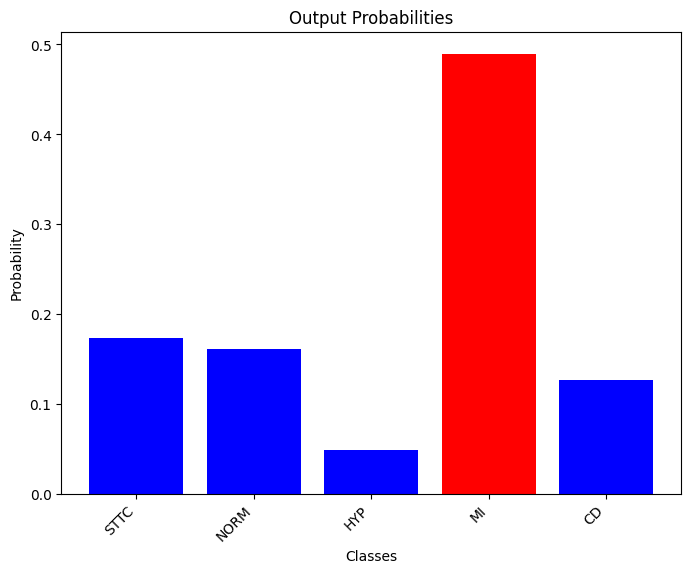

In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
    results = model(data)
    print(results)
    probabilities = torch.softmax(results, dim=1).cpu().numpy()[0]  # Convert to NumPy array
    print(f"Real class: {real_label} --- Predicted HR value: {probabilities}")

# Plot the probabilities
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors, with the maximum probability bar in red
colors = ['b'] * len(probabilities)
colors[np.argmax(probabilities)] = 'r'

ax.bar(range(len(probabilities)), probabilities, color=colors)
ax.set_xticks(range(len(probabilities)))
ax.set_xticklabels(["STTC", "NORM", "HYP", "MI", "CD"], rotation=45, ha='right')
ax.set_xlabel('Classes')
ax.set_ylabel('Probability')
ax.set_title('Output Probabilities')
plt.show()

# First Aid

1. Administer aspirin and other antiplatelet medications.
2. Provide oxygen therapy if necessary.
3. Initiate reperfusion therapy (thrombolytic drugs or primary percutaneous coronary intervention) to restore blood flow to the affected area of the heart.
4. Administer medications to manage pain, blood pressure, and heart rate.
5. Monitor closely for complications, such as arrhythmias or heart failure.
6. Provide supportive care and begin cardiac rehabilitation planning.